In [2]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv

# Data Import

In [ ]:
#load_dotenv() # This reads the environment variables inside .env

# AWS_ACCESS_KEY_ID = os.getenv('AWS_ACCESS_KEY_ID')
# AWS_SECRET_ACCESS_KEY = os.getenv('AWS_SECRET_ACCESS_KEY')
# REGION_NAME = os.getenv('REGION_NAME')
# BUCKET = os.getenv('BUCKET')
# FILENAME = os.getenv('FILENAME')
# import boto3

# s3 = boto3.client('s3',
#                   aws_access_key_id=AWS_ACCESS_KEY_ID,
#                   aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
#                   region_name=REGION_NAME)

# import io

# obj = s3.get_object(Bucket=BUCKET, Key=FILENAME)
# data = io.BytesIO(obj['Body'].read())

In [3]:
cdc = pd.read_csv('creditcard.csv')
cdc.info()
cdc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
cdc.tail()

# Dealing with class imbalance

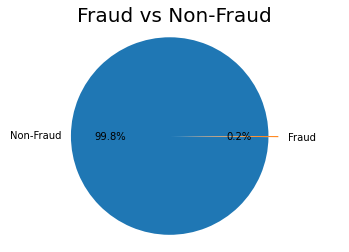

In [4]:
def pie_chart_binary(data, title='Fraud vs Non-Fraud'):
    labels = 'Non-Fraud', 'Fraud'

    # if data is Series object then use value_counts()
    if isinstance(data, pd.Series):
        sizes = data.value_counts()
    
    # if data is DataFrame object then use Class column
    elif isinstance(data, pd.DataFrame):
        sizes = [len(data[data.Class == 0]), len(data[data.Class == 1])]

    explode = (0, 0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')

    plt.title(title, fontsize=20)
    ax1.axis('equal')  
    plt.show()

pie_chart_binary(cdc)

In [5]:
#Based on the above pie chart, we can see that the data is highly imbalanced. We will need to use SMOTE to balance the data.

#copy the bacic data into a new dataframe
cdc2 = cdc.copy()

X = cdc2.drop(['Time', 'Amount', 'Class'], axis=1)
y = cdc2['Class']

# split the data into training, validation, and test sets
# we will use 60% of the data for training, 20% for validation, and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=101)

# scale the data using StandardScaler
# we will fit the scaler to the training data and then use it to transform the training, validation, and test sets

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# save the original data for later use
X_train_org = X_train
y_train_org = y_train

# X_val_org = X_val
# y_val_org = y_val

# X_test_org = X_test
# y_test_org = y_test

# SMOTE  (Synthetic Minority Oversampling Technique)

Advantages:

- Simple and easy to implement
- Improves the performance of machine learning models on imbalanced datasets
- Can handle various types of data, including numerical and categorical


Disadvantages:

- Can generate synthetic data points that are very similar to existing data points, leading to overfitting
- May not be effective for datasets with complex class distributions

In [6]:
# compate before and after SMOTE to see the difference 

print('Before OverSampling, the shape of train_X: {}'.format(X_train_org.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train_org.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train_org==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train_org==0)))
print("")

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=101)
X_train, y_train = sm.fit_resample(X_train, y_train)


print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, the shape of train_X: (170883, 28)
Before OverSampling, the shape of train_y: (170883,) 

Before OverSampling, counts of label '1': 296
Before OverSampling, counts of label '0': 170587

After OverSampling, the shape of train_X: (341174, 28)
After OverSampling, the shape of train_y: (341174,) 

After OverSampling, counts of label '1': 170587
After OverSampling, counts of label '0': 170587


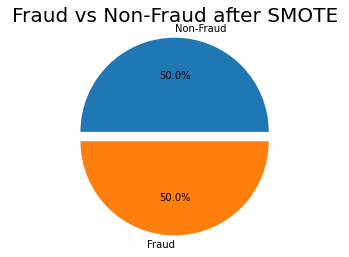

In [7]:
# visualize the data after SMOTE

pie_chart_binary(y_train, title='Fraud vs Non-Fraud after SMOTE')

# GAN (Generative Adversarial Network)


Advantages:

- Can generate realistic and diverse synthetic data points
- Can handle various types of data, including images, audio, and text
- Can improve the generalization of machine learning models


Disadvantages:

- More complex and difficult to implement than SMOTE
- Require a large amount of training data
- Sensitive to the choice of hyperparameters
- Can generate synthetic data that does not accurately represent the underlying data distribution.

In [ ]:
#!pip install ctgan

In [ ]:
# from ctgan import CTGAN

# # create a synthetic dataset using CTGAN
# ctgan = CTGAN(epochs=1)
# ctgan.fit(X_train_org, y_train_org)

# # generate the same number of samples as the original data
# X_train_ctgan, y_train_ctgan = ctgan.sample(len(X_train_org))

# # visualize the data after CTGAN

# f

In [8]:
import wandb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

def log_metrics(model_name, split_name, y_true, y_pred, y_proba=None):
    """
    Logs classification metrics to a WandB table.
    
    Arguments:
    - model_name (str): Name of the model being evaluated.
    - split_name (str): Name of the dataset being evaluated (e.g. "train", "val", "test").
    - y_true (array-like): True class labels for the samples.
    - y_pred (array-like): Predicted class labels for the samples.
    - y_proba (array-like, optional): Predicted probabilities for the positive class.
    """
    # Calculate metrics and create a df that can be converted to a WandB table
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

    # if y_proba is not None:
    #     metrics['roc_auc'] = roc_auc_score(y_true, y_proba)

    metrics_df = pd.DataFrame(metrics, index=[0])
    my_table = wandb.Table(dataframe=metrics_df)

    # Log the metrics table to WandB
    wandb.log({f"{model_name} {split_name} ": my_table})

    # plot the confusion matrix

    #log metric to chart
    # wandb.log({f"{model_name} {split_name} accuracy": metrics['accuracy']})
    # wandb.log({f"{model_name} {split_name} precision": metrics['precision']})
    # wandb.log({f"{model_name} {split_name} recall": metrics['recall']})
    # wandb.log({f"{model_name} {split_name} f1": metrics['f1']})
    # if y_proba is not None:
    #     wandb.log({f"{model_name} {split_name}": metrics['roc_auc']})
    # else:
    #     wandb.log({f"{model_name} {split_name}": 'N/A'})
    


def log_model(model, name, epoch=0):
    # Log the model as a pickle file to WandB
    with open(f"{name}_{epoch}.pickle", "wb") as f:
        pickle.dump(model, f)
    artifact = wandb.Artifact(name=name, type='model')
    artifact.add_file(f"{name}_{epoch}.pickle")
    wandb.log_artifact(artifact)
    print(f"Model '{name}_{epoch}' logged to WandB.")

# Reduction model - Random Forest, Gradient Boosting

In [1]:
# !pip3 install wandb
import wandb

wandb.login()

wandb: Currently logged in as: project-machine-learning (project-ml-51). Use `wandb login --relogin` to force relogin


True

In [ ]:
# !wandb sync 

In [ ]:
# !wandb sync --clean

In [ ]:
# !wandb login --relogin

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
import wandb


# Initialize wandb
wandb.init(project="CC_Fraud_Detection_RF")

n_estimators = 1
random_state = 42

# Log the hyperparameters to wandb
config = wandb.config
config.n_estimators = n_estimators
config.random_state = random_state

# Create Random Forest classifier 
clf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

# Fit the model to the training data and log the metrics to wandb
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
log_metrics("Random_Forest", "val", y_val, y_pred)
log_model(clf, "Random_Forest")

#log_confusion_matrix("Random_Forest", "val", y_val, y_pred)
#log_classification_report("Random_Forest", "val", y_val, y_pred)

# Evaluate the final performance of the model and log the metrics to wandb
y_pred = clf.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Finish the wandb run
wandb.finish()

Model 'Random_Forest_0' logged to WandB.
[[56714   155]
 [   20    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.32      0.78      0.45        93

    accuracy                           1.00     56962
   macro avg       0.66      0.89      0.73     56962
weighted avg       1.00      1.00      1.00     56962



# Recognition model - Naive Bayes, Deep Learning Models

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import wandb

# Initialize wandb
wandb.init(project='CC_Fraud_Detection_NB')


# Create Naive Bayes classifier
clf = GaussianNB()


# Fit the model to the training data and log metrics
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
log_metrics("Naive_Bayes", "val", y_val, y_pred)
log_model(clf, "Naive_Bayes")

# Evaluate the performance of the model on the test set
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Finish the wandb run
wandb.finish()

Model 'Naive_Bayes_0' logged to WandB.
[[55467  1402]
 [   13    80]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56869
           1       0.05      0.86      0.10        93

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.98      0.99     56962



# Anomaly model - k-means clustering, Local Outlier Factor (LOF), and Isolation Forest


In [11]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import wandb

# Initialize wandb
wandb.init(project="CC_Fraud_Detection_IF")

# Log hyperparameters
config = wandb.config
config.n_estimators = 100
config.max_samples = 'auto'
config.contamination = 'auto'
config.random_state = 42

# Initialize Isolation Forest model
model = IsolationForest(n_estimators=config.n_estimators,
                        max_samples=config.max_samples,
                        contamination=config.contamination,
                        random_state=config.random_state)


# Fit the model to the training data and log metrics
model.fit(X_train)

# Evalue the performance of the model on the test set
y_pred = model.predict(X_val)

#create a confusion matrix
print(confusion_matrix(y_val, y_pred))

# Print the classification report
print(classification_report(y_val, y_pred))

# Finish the wandb run
wandb.finish()


[[    0     0     0]
 [  538     0 56331]
 [   23     0    70]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     56869
           1       0.00      0.75      0.00        93

    accuracy                           0.00     56962
   macro avg       0.00      0.25      0.00     56962
weighted avg       0.00      0.00      0.00     56962



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [12]:
# Ensamble models - bagging, boosting, stacking

from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import pickle
import wandb

#load the models
rf_clf = pickle.load(open("Random_Forest_0.pickle", "rb"))
nb_clf = pickle.load(open("Naive_Bayes_0.pickle", "rb"))

# Initialize wandb
wandb.init(project="CC_Fraud_Detection_Ensemble")

# Define the bagging ensemble model
bag_clf = BaggingClassifier(base_estimator=[rf_clf, nb_clf], n_estimators=10, max_samples=0.8, random_state=42)

# Train the ensemble model
bag_clf.fit(X_train, y_train)
log_metrics("Bagging_Ensemble", "val", y_val, y_pred)
log_model(bag_clf, "Bagging_Ensemble")

#Define the boosting ensemble model
boost_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=10, random_state=42)

# Train the ensemble model
boost_clf.fit(X_train, y_train)
log_metrics("Boosting_Ensemble", "val", y_val, y_pred)
log_model(boost_clf, "Boosting_Ensemble")

# Define the stacking ensemble model
stack_clf = StackingClassifier(estimators=[('rf', rf_clf), ('nb', nb_clf)], final_estimator=LogisticRegression())

# Train the ensemble model
stack_clf.fit(X_train, y_train)
log_metrics("Stacking_Ensemble", "val", y_val, y_pred)
log_model(stack_clf, "Stacking_Ensemble")

# Finish the wandb run
wandb.finish()

InvalidParameterError: The 'base_estimator' parameter of BaggingClassifier must be an object implementing 'fit' and 'predict', a str among {'deprecated'} or None. Got [RandomForestClassifier(n_estimators=1, random_state=42), GaussianNB()] instead.

Ensemble methods

# Final experiment 

- run final experiment of the test set



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest
import wandb

# Load test data
# test_df = pd.read_csv("test_data.csv")

# Load trained models
rf_model = RandomForestClassifier()
# rf_model.load("Random_Forest_9.pickle")
rf_model.fit(X_train, y_train)

# if_model = IsolationForest()
# if_model.load("if_model.pkl")

# gnb_model = GaussianNB()
# gnb_model.load("gnb_model.pkl")

# Make predictions on test set using trained models
rf_preds = rf_model.predict(X_test)
# if_preds = if_model.predict(test_x)
# gnb_preds = gnb_model.predict(test_x)

# Calculate evaluation metrics
rf_cm = confusion_matrix(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds, output_dict=True)
rf_roc_auc = roc_auc_score(y_test, rf_preds)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_preds)

# if_cm = confusion_matrix(test_y, if_preds)
# if_report = classification_report(test_y, if_preds, output_dict=True)
# if_roc_auc = roc_auc_score(test_y, if_preds)
# if_fpr, if_tpr, _ = roc_curve(test_y, if_preds)

# gnb_cm = confusion_matrix(test_y, gnb_preds)
# gnb_report = classification_report(test_y, gnb_preds, output_dict=True)
# gnb_roc_auc = roc_auc_score(test_y, gnb_preds)
# gnb_fpr, gnb_tpr, _ = roc_curve(test_y, gnb_preds)

# Log metrics in wandb table
wandb.init(project="fraud-detection-experiment", entity="project-machine-learning")
table = wandb.Table(columns=["Model", "Recall", "Precision", "F1", "ROC", "AUC"])

table.add_data("Random Forest", rf_report["1"]["recall"], rf_report["1"]["precision"], rf_report["1"]["f1-score"], rf_roc_auc, rf_cm[1][1]/(rf_cm[1][1]+rf_cm[0][1]))
# table.add_data("Isolation Forest", if_report["1"]["recall"], if_report["1"]["precision"], if_report["1"]["f1-score"], if_roc_auc, if_cm[1][1]/(if_cm[1][1]+if_cm[0][1]))
# table.add_data("Gaussian Naive Bayes", gnb_report["1"]["recall"], gnb_report["1"]["precision"], gnb_report["1"]["f1-score"], gnb_roc_auc, gnb_cm[1][1]/(gnb_cm[1][1]+gnb_cm[0][1]))

wandb.log({"metrics": table})
wandb.finish()

Ensemble method

# KNN algorithm

In [ ]:
cdc.tail()

In [ ]:
scaler = StandardScaler()
df = cdc.drop(['Class','Time','Amount'], axis = 1)
scaler.fit(df)

scaled_features = scaler.transform(df)

In [ ]:
cdc_feat = pd.DataFrame(scaled_features, columns = cdc.columns[1:-2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,cdc['Class'], test_size = 0.30)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test,pred))

# Initial analysis of data

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.savefig("plots/correlation_matrix.png", dpi=300)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.savefig("plots/scatter_matrix.png", dpi=300)
    plt.show()

In [ ]:
nRowsRead = 1000
df1 = pd.read_csv('../project-data/creditcard.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

In [ ]:
plotCorrelationMatrix(df1, 8)

In [ ]:
fig = plotScatterMatrix(df1, 20, 10)

In [ ]:
figure = sns.scatterplot(x="Amount",y="V1", data=df1)
figure.set(title = "Example of one user")
# figure.figure.savefig("plots/test.png", dpi = 150)